# Алгоритм имитации отжика

Алгоритм основан на имитации физического процесса, при котором происходит отжиг металлов.
То есть необходимо привести вещество к состоянию с наименьшей энергией. Сначало металл нагревают до необходимой температуры, затем начинают охлаждать. Атомы с некоторой вероятностью попадают в состояние с наименьшей энергией, чем меньше температура тем больше вероятность.

Основным свойством данного метода является свойство избежать ловушки локального минимума функции, и продолжать поиск глобального минимума 

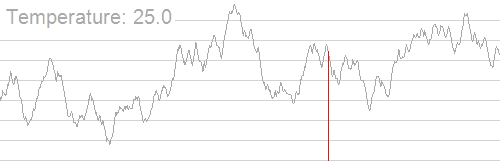

Алгоритм:

      
      S - множестово всех состояний

      T - Температура системы
      
      E - Функиция энергии каждого элемента из множества состояний
      
      Sn - Новое состояние системы
      
      F - Функция порождающая новое состояние
      
1) Случайным образом выбирается начальное состояние.

2) Устанавливается начальная(T0) и конечная температура.

3) Пока Tmax > Tmin: 
          
*   Sn = F(Si - 1)
*   ΔE = E(Sn) - E(Si-1)
*   Если ΔE <= 0, то Si = Sn
*   Если ΔE >= 0, то переход осуществляется с вероятностью P(ΔE) = e^(-ΔE/Ti)
*   Понижаем температуру, если T <= Tmin, то возвращаем Sn, иначе повторяем шаг 3

# Общие схемы метода отжига


## Больцмановский отжиг

В данном варианте обжига изменение температуры задается формулой T(i)=T0/ln(1+i). 

Больцмановский обжиг работает при достаточно больших значениях Т.

Недостатоком данного метода, является медленное убывание температуры


## Отжиг Коши

Температура изменяется по формуле T(i)=T0/i



#Пример решения на задаче коммивояжёра

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

cities = np.array([[10, 2], [1, 0], [5, 6], [3, 4], [4, 5], [7, 3], [1, 5], [5, 1], [5, 3]])
countSities = len(cities)

In [2]:
def getProbability(dE, T):#вероятность перехода
    return math.exp((-dE) / T)

In [3]:
def getNewTemperature(T, i):#расчет температуры
    T = T * 0.1 / i
    return T

In [4]:
def reversSequenceCities(citi):#Генерация новой последовательности
    c1 = 0
    c2 = 0
    while (c1 == c2):
        c1 = random.randrange(0, countSities)
        c2 = random.randrange(0, countSities)
    citi[c1],citi[c2]=citi[c2],citi[c1]
    return citi

In [5]:
def getNewCoord(sequence):#Перестановка координат
    array = np.random.random((9, 2))
    for i in range(0, countSities):
        array[i] = cities[sequence[i]]
    return array

In [6]:
def getEnergy(cities):#Расчет растояния
    energy = 0
    x, y = zip(*cities)
    for i in range(0, countSities - 1):
        value = math.sqrt(math.pow(x[i + 1] - x[i], 2) + math.pow(y[i + 1] - y[i], 2))
        energy = energy + value
    return energy

In [7]:
def getTransition(probability):#Вероятность перехода
    value = random.random()
    if (value <= probability):
        a = 1
    else:
        a = 0
    return a

In [8]:
Tmax = 100
Tmin = 0.001
energy = getEnergy(cities)
T = Tmax
sequence = np.arange(countSities)
for i in range(1,100000):
    print(sequence)
    newSequence = reversSequenceCities(sequence)#Расчет новой последовательности
    newCoordSities = getNewCoord(newSequence)#Перестановка городов
    newEnergy = getEnergy(newCoordSities)#Расчет расстояния
    if newEnergy < energy: 
        energy = newEnergy
        sequence = newSequence
        cities = newCoordSities
    else:
        probability = getProbability(newEnergy - energy, T) #Вероятность перехода
        if getTransition(probability): 
            energy = newEnergy
            sequence = newSequence
            cities = newCoordSities
    T = getNewTemperature(Tmax, i)
    print("Температура = " + str(T))
    print("Расстояние = " + str(energy))
    if (T <= Tmin):
        break

Выходные данные были обрезаны до нескольких последних строк (5000).
Температура = 0.0011999040076793857
Расстояние = 22.113122279787035
[3 6 1 5 8 4 2 7 0]
Температура = 0.0011997600479904018
Расстояние = 22.113122279787035
[3 6 0 5 8 4 2 7 1]
Температура = 0.0011996161228406909
Расстояние = 22.113122279787035
[3 5 0 6 8 4 2 7 1]
Температура = 0.0011994722322178242
Расстояние = 22.113122279787035
[3 7 0 6 8 4 2 5 1]
Температура = 0.0011993283761093788
Расстояние = 22.113122279787035
[8 7 0 6 3 4 2 5 1]
Температура = 0.001199184554502938
Расстояние = 22.113122279787035
[8 0 7 6 3 4 2 5 1]
Температура = 0.001199040767386091
Расстояние = 22.113122279787035
[8 2 7 6 3 4 0 5 1]
Температура = 0.0011988970147464332
Расстояние = 22.113122279787035
[5 2 7 6 3 4 0 8 1]
Температура = 0.0011987532965715656
Расстояние = 22.113122279787035
[3 2 7 6 5 4 0 8 1]
Температура = 0.001198609612849095
Расстояние = 22.113122279787035
[3 2 7 6 5 1 0 8 4]
Температура = 0.0011984659635666348
Расстояние = 22.113

22.113122279787035


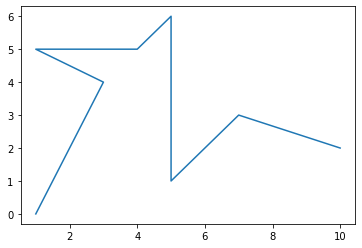

In [9]:
print(energy)
x, y = zip(*cities)
plt.plot(x, y)
plt.show()